Problem 1. Suppose $U$ is nxm with n≥m and $U^TU=I$. Let $b$ be any vector in $\Re^n$ and we compute the projection $Pb=U\hat{x}$. What is $\hat{x}$ in terms of $U$ and $b$?

<br><span style="color:green">
    <b>Answer:</b>
<br>
$P$ is the projection to the column space of $U$, and using the formula given in lecture, $P = U(U^TU)^{-1}U^T = UU^T$ so $\hat{x} = U^TU\hat{x} = U^TPb = U^TUU^Tb = U^Tb$.
</span>

Problem 2.  Show that $\|\hat{x}\| = \|U\hat{x}\|$ in the problem above, where $\|a\|$ is defined as $\sqrt{a^Ta}$.

<br><span style="color:green">
    <b>Answer:</b>
<br>$(U\hat{x})^T(U\hat{x}) = \hat{x}^TU^TU\hat{x} = \hat{x}^T\hat{x}$ where the second equality is using the given fact that $U^TU=I$.
</span>

Problem 3. (Extension of GS p. 216 Problem 11a)

Let $A = \begin{pmatrix} 1 & 1\\ 0 & 1\\ 0 & 0 \end{pmatrix}$ and $b =\begin{pmatrix} 2 \\ 3 \\ 4 \end{pmatrix}$.

3a) Compute the projection of b onto the column space of $A$ by hand calculation:

<br><span style="color:green">
    <b>Answer:</b>
    <br>The projection is $A(A^TA)^{-1}A^Tb = \begin{bmatrix} 2\\3 \end{bmatrix}$. Equivalently, one could notice that the column space of $A$ is just the $xy$ plane contained in $\mathbb{R}^3$, and the projection of a vector $\begin{bmatrix} x\\y\\z\end{bmatrix}$ to the $xy$ plane is just $\begin{bmatrix} x\\y\\0\end{bmatrix}$.
</span>


3b) Check your answer by using Julia to compute $(A^T A)^{-1}(A^Tb)$. What do you observe?

In [39]:
A = [1 1 ;0 1; 0 0]
b = [2, 3, 4]
(A'A)\(A'b)

2-element Array{Float64,1}:
 -1.0
  3.0

<br><span style="color:green">
    <b>Answer:</b>
<br>The projection of $b$ to the space spanned by the columns of $A$ is, by definition, a vector in the span $C(A)$, i.e. a vector of the form $Ax$. The expression above finds $x$. The projection (found in part (a)) is $Ax = A\begin{bmatrix}-1\\3\end{bmatrix} = \begin{bmatrix} 2\\3\\0\end{bmatrix}$.
</span>

3c) Check your answer by typing $A\b$. What do you observe?

In [40]:
A\b

2-element Array{Float64,1}:
 -1.0
  3.0

<br><span style="color:green">
    <b>Answer:</b>
<br>This is the same as the previous part. Backslash solves the least squares problem.
</span>

3d) Find $A \hat{x}=p$ using the svd and compare with the standard approach. What do you observe?

In [5]:
U,s,V = svd(A)
[U*U'b A*inv(A'A)*A'b]

3×2 Array{Float64,2}:
 2.0  2.0
 3.0  3.0
 0.0  0.0

<br><span style="color:green">
    <b>Answer:</b>
    <br>You should notice that $UU^Tb = A(A^T)^{-1}A^Tb$ in this case. Note that $\hat{x}$ is what was computed in parts (b) and (c), and the answers here are $A\hat{x}$, the actual projection.
<br><br>(Why the equality? In the case (such as here) where $A$ is comprised of linearly independent columns, for rank reasons we have that $\Sigma$ also has full rank, i.e. it is invertible. In this case, I claim that $UU^T$ is a projection matrix onto the column space of $A$. First note that $A = U\Sigma V^T \implies U^TA = U^TU\Sigma V^T = \Sigma V^T\implies UU^TA = U\Sigma V^T = A$. So $UU^T$ acts as the identity on $C(A)$.
    Next we have to show that $UU^T$ is zero on the orthogonal complement of $C(A)$, i.e. on $N(A^T)$. Let $x$ be in $N(A^T)$, so that $A^Tx=0$. We need to show that $UU^Tx=0$. From $A = U\Sigma V^T$ we have $AV = U\Sigma\implies AV\Sigma^{-1} = U$. So $U^Tx = \Sigma^{-1}V^TA^Tx = 0$.)
</span>


3e) Also compare the values in problem 2 above.  What do you observe?

In [18]:
x̂ = A\b
norm(x̂),norm(U*x̂)

(3.162277660168378, 3.1622776601683777)

<br><span style="color:green">
    <b>Answer:</b>
<br>They are the same. `A\b` finds the vector $\hat{x}$ such that $A\hat{x}$ is the projection of $b$ to the column space of $A$.
</span>

4)  Using Julia, find the best fit parabola through four random points:

In [6]:
x = sort(rand(4))
y = sort(rand(4))

4-element Array{Float64,1}:
 0.0367565
 0.34282  
 0.365556 
 0.889116 

In [31]:
A = [ones(x) x x.^2]
? \ ?  # Fill in the question marks and interpret briefly the answer

In [32]:
A\y

3-element Array{Float64,1}:
 0.0860273
 0.233275 
 0.422032 

<br><span style="color:green">
    <b>Answer:</b>
<br>You're supposed to compute `A\y`. This is a vector $\hat{q}$ that is the "closest to being a solution" for $Aq = y$. An actual solution $q$ to $Aq = y$ is a vector $q = \begin{bmatrix}a\\b\\c\end{bmatrix}$ such that all of the points $(x_i, y_i)$ fall on the parabola $a + bx + cx^2 = y$. In general, there is no such exact solution, and instead $\hat{q} = \begin{bmatrix}\hat{a}\\\hat{b}\\\hat{c}\end{bmatrix}$ contains the coefficients such that $\hat{a} + \hat{b}x + \hat{c}x^2 = y$ is the <i>best fit</i> quadratic through those points.
</span>

5) Using Julia and the same points as in problem 4, find the best fit curve of the form
$y = C*sin(x) + D*e^x + E*x$ through the four points.

Note: If x is a vector, sin.(x) and e.^x may be useful constructs for the elementwise evaluation of the functions.

<br><span style="color:green">
    <b>Answer:</b>
<br>Just as in the previous problem, we want to compute `A\y` where the rows of $A$ are $[\sin x_i, e^{x_i}, x_i]$. In Julia notation, this is:
</span>


In [37]:
A = [sin.(x) e.^x x]

4×3 Array{Float64,2}:
 0.128975  1.13807  0.129335
 0.303099  1.36062  0.307943
 0.764774  2.38856  0.870691
 0.821985  2.62449  0.964888

In [38]:
A\y

3-element Array{Float64,1}:
 -3.46915 
  0.145183
  3.31982 

<span style="color:green">
An exact solution would be a vector $q=\begin{bmatrix}C\\D\\E\end{bmatrix}$ such that $Aq = y$, i.e. $C\sin x_i + De^{x_i} + Ex_i = y_i$, and the output of $A\backslash y$ is a vector of coefficients $\hat{C},\hat{D},\hat{E}$ such that $\hat{C}\sin(x) + \hat{D}e^x + \hat{E}x = y$ is the <i>best fit</i> equation of that form through these points.
</span>

6) In this problem we explore how to let data define the subspace using the SVD. We will use an often used data set known as the [MNIST data base](https://en.wikipedia.org/wiki/MNIST_database) for character recognition. 

Some of you are good coders and may want to understand the code below.  That is not required of 18.06.  Those of you who prefer not to look at code, there is no need.  What we want most is for you to see the idea below.  We will in very few lines of code, completely from scratch write a character recognition machine learning code.  We'd like you to understand the idea of how it works, not the code.

(Credit to Raj Rao, University of Michigan.)

In [14]:
using Flux, Flux.Data.MNIST, Images

Grab 60000 images of handwritten digits

In [15]:
imgs = MNIST.images()
labels = MNIST.labels()
size(imgs)

(60000,)

Let's look at the first 24 (you can look at more if you like)

,,,,,,,
,,,,,,,
,,,,,,,

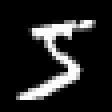
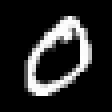
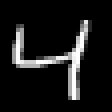
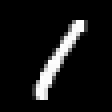
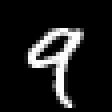
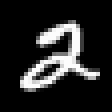
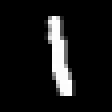
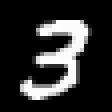
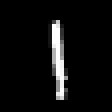
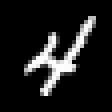
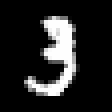
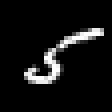
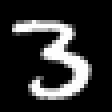
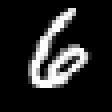
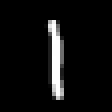
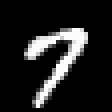
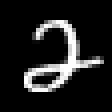
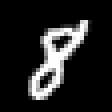
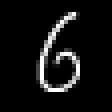
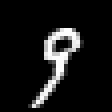
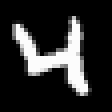
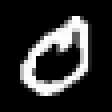
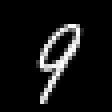
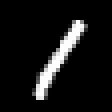

In [16]:
reshape(imgs[1:24],8,3)  # Not sure why this is 8x3 and not 3x8, but whatever

Here are the numerical labels of the same data

In [17]:
labels[1:24]'

1×24 RowVector{Int64,Array{Int64,1}}:
 5  0  4  1  9  2  1  3  1  4  3  5  3  6  1  7  2  8  6  9  4  0  9  1

In [18]:
size(imgs[1]) # Each image is a 28x28=784  matrix of "gray scale" numbers from 0 to 1

(28, 28)

Reorganize the data as one big 784x60000 matrix labeled D.
Each column is a 28x28 image flattened, and we have 60000 images.

In [39]:
D =  hcat([vec(Float64.(i)) for i in imgs]...) 
size(D)

(784, 60000)

For each of the digits 1,2,...,9,0 we find 500 images to train with.  (500 is arbitrary)
<br>Each training set becomes a 784x500 matrix.  training_data is a vector of ten such matrices.

In [113]:
training_size = 500
training_data = [ D[:,find(labels.== (i%10))[1:training_size]] for i=1:10]; # Find training images for each digit
size(training_data[1])

(784, 500)

We compute the $U$ in the SVD of each of the above ten matrices of size 784 x 500, and
take the first 50 columns as the basis of a subspace to project onto. u is a vector of ten matrices $U$
one for each digit. (50 is arbitrary).  (This could have been a 784x500x3 array, but a 10 vector of 784x500\n",
    "matrices seemed more convenient.)

In [41]:
singular_vec_size  =  50
u = [svdfact(training_data[i])[:U][:,1:singular_vec_size] for i=1:10];

Now we use each of the 10 U's to get 10 xhats, and see which has the greatest norm.  That is how we will recognize digits.  Note that having the largest xhat means, the smallest error. (Think ‖b‖² = ‖p‖² + ‖e‖² )

In [44]:
results = zeros(60000)
for j = 1:60000
   xhats = [ norm(u[i]'D[:,j]) for i=1:10]
   results[j] = rem(findmax(xhats)[2],10)
end

How well does this work?  nearly a 95% success rate!  Pretty cool huh?  

In [43]:
mean( results .== labels)

0.9463166666666667

Write in your own words an explanation of what we just did in terms of projecting onto ten data defined subspaces.

<br><span style="color:green">
    <b>Answer:</b>
<br>Each $24\times 24$ pixel image can be thought of as a vector in $\mathbb{R}^{784}$. For each digit, we want to find a subspace of $\mathbb{R}^{784}$ corresponding to images that are likely to represent that digit. The training stage consists of defining these subspaces. The assumption is that the subspaces can be reasonably modeled by 50-dimensional subspaces. For each digit, we take 500 images (vectors); we hope that they all lie in a 50-dimensional subspace, but there's noise, so instead we try to project to the "closest" 50-dimensional subspace. 
    <br><br>Fix a particular digit whose subspace we are trying to find, and let $A$ be the $784 \times 500$ matrix whose columns are the 500 chosen images of that digit. Compute the SVD $A = U\Sigma V^T$, and assume we're in the "generic" case where $\Sigma$ is invertible. As we saw in the last pset, this means that $C(A) = C(U)$. So we're trying to find a smaller approximation to $C(A)$, so we may as well try to find a smaller approximation to $C(U)$... and the point is that $C(U)$ is designed to tell us <i>which</i> parts of $C(A)$ are more relevant. 
    <br><br>Recall that, by convention, the $\sigma_i$'s in $\Sigma$ are decreasing. The idea is that the first columns of $U$ (the ones corresponding to larger $\sigma_i$'s) "matter more" than the later ones, and the columns of $U$ corresponding to very small $\sigma_i$'s don't matter very much and can be safely discarded as noise. More precisely, the claim is that the columns of $A$ (which, recall, corresponded to actual images) have small projections to columns corresponding to small $\sigma_i$'s. So the first 50 columns of $U$ form a basis of the "closest" 50-dimensional subspace to $C(A)$.
    <br><br>The last step is to take an image `D[:,j]` not in the training set and guess which digit it represents by checking which digit subspace it has the largest projection in. This amounts to checking that. We showed in problem 1 that the projection of a vector $b$ to $C(U)$ (where $U$ satisfies $U^TU=I$) is given by $U\hat{x} = UU^Tb$. So actually we are checking the norm of $\hat{x} = U^Tb$, not the norm of the projection $U\hat{x}$, but we showed in problem 2 that it doesn't matter because these have the same norm.
</span>


Problem 7. In the above the columns of u[1] is a basis for the the ones digit, and the columns of u[2] is a basis for the twos digit.  Are the column spaces of u[1] and u[2] orthogonal subspaces? You can use Julia to test.

<br><span style="color:green">
    <b>Answer:</b>
<br>If the starting data was horrible, in theory there's not even anything to stop these subspaces from overlapping -- maybe everything labelled as a 2 actually looked like a 1, and so the two subspaces are roughly the same. Even if the starting data is reasonable, images of different digits actually have lots of similarities; imagine trying to take the dot product of a "1" and a "2" image above, where black = 0 and white = 1: any place the two images had white in the same place would contribute to the dot product, which would certainly not be zero. One can observe this with Julia: if the columns of `u[1]` were orthogonal to the columns of `u[2]`, then `u[1]'*u[2]` would be the zero matrix, but instead we get:
</span>


In [111]:
u[1]'*u[2]

50×50 Array{Float64,2}:
  0.684282     0.316322     0.0823226   …   0.0384383   -0.0525074 
  0.0233211   -0.0999189   -0.127974       -0.0211146    0.0124693 
 -0.216043     0.0725833    0.0217695       0.00429097   0.153336  
  0.00198653   0.132966    -0.0140977       0.0407351   -0.12602   
 -0.136065    -0.0390635    0.194529        0.0780451   -0.119692  
 -0.338652     0.0236509    0.00318601  …   0.0680376    0.0245933 
  0.0138575    0.110445     0.0749107      -0.147619     0.0610449 
  0.0683933    0.0296923   -0.14587        -0.0483423   -0.0928341 
  0.0879142    0.095486     0.0532868       0.0672751    0.162873  
 -0.143373    -0.141363     0.13083        -0.0106668   -0.0561302 
  0.119529    -0.152697    -0.24872     …   0.0714331   -0.0812563 
 -0.0721322    0.107925     0.139427        0.187336     0.0649331 
  0.0514667    0.0304977   -0.101355       -0.0858727    0.0396023 
  ⋮                                     ⋱                          
 -0.0721643    0.0969516

Problem 8.  GS p. 231.

What condition on ($t_1,b_1$),($t_2,b_2$),($t_3,b_3$) puts three points on  a straight line?  A column space answer has $(b_1,b_2,b_3)$ being a linear combination of $(1,1,1)$ and $(t_1,t_2,t_3)$.  How simple an answer can you get?

<br><span style="color:green">
    <b>Answer:</b>
<br>If the line is vertical, then $t_1 = t_2 = t_3$. Otherwise we can assume we don't have both $t_1 = t_2$ and $t_1 = t_3$. Suppose the points are on the line $y = mx + b$. If the line is not vertical, this means
    \begin{align*}\begin{bmatrix}1 & t_1 \\ 1 & t_2 \\ 1& t_3\end{bmatrix}\begin{bmatrix} b\\m\end{bmatrix} = \begin{bmatrix} b_1\\b_2\\b_3\end{bmatrix}\end{align*}
    has a solution.
    If we try to solve this system by elimination we get
    \begin{align*} \begin{bmatrix} 1 & t_1 & b_1 \\ 1& t_2 & b_2 \\ 1& t_3 & b_3 \end{bmatrix}\implies \begin{bmatrix} 1 & t_1 & b_1 \\ 0& t_2-t_1 & b_2-b_1 \\ 0& t_3-t_1 & b_3-b_1 \end{bmatrix}
    \end{align*}
    This has a solution if and only if: either the second or third row is entirely zero, or the third row is a multiple of the second. These conditions, together with the possibility that the line is vertical, are encapsulated in the single condition
    $$ (t_2-t_1)(b_3-b_1) = (t_3-t_1)(b_2-b_1). $$
    (Note this is the same as requiring the determinant of the matrix on the left to be zero.)
</span>
